In [177]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D

from pandas.plotting import scatter_matrix
import math

# Get the Data

In [178]:
maneuvers = pd.read_csv("maneuvers.csv")
#maneuvers.head()

In [179]:
maneuvers.describe()

,t,x,y,z,dx,dy,dz,dv_st
count,1611.000000,1611.000000,1.611000e+03,1611.000000,1.611000e+03,1611.000000,1.611000e+03,1.611000e+03
mean,1888.329206,-0.990426,4.625474e-07,-0.000165,2.106950e-07,0.000007,-2.293783e-07,7.903239e-13
std,1087.191417,0.001020,3.211465e-03,0.000709,2.137882e-03,0.006605,1.462589e-03,1.190906e-12
min,7.011123,-0.991665,-4.521058e-03,-0.001121,-3.245545e-03,-0.009033,-2.051272e-03,-1.356006e-12
25%,947.670150,-0.991459,-3.225939e-03,-0.000867,-1.972796e-03,-0.006503,-1.474532e-03,-1.374632e-13
50%,1888.329000,-0.990594,-1.989735e-06,-0.000213,-1.827943e-06,-0.000346,7.882237e-07,4.954636e-13
75%,2828.988500,-0.989404,3.223399e-03,0.000537,1.982946e-03,0.006466,1.471320e-03,1.712702e-12
max,3769.647000,-0.988843,4.521061e-03,0.000898,3.245547e-03,0.009931,2.051271e-03,3.570318e-12


Notice that dv_vel varies in the range -2e-7 to 1e-7, while dv_st varies in the range -7e-9 to 4e-9, so the MOST COSTLY maneuvers are much larger using CORRECTION_VEL method than using CORRECTION_ST !!

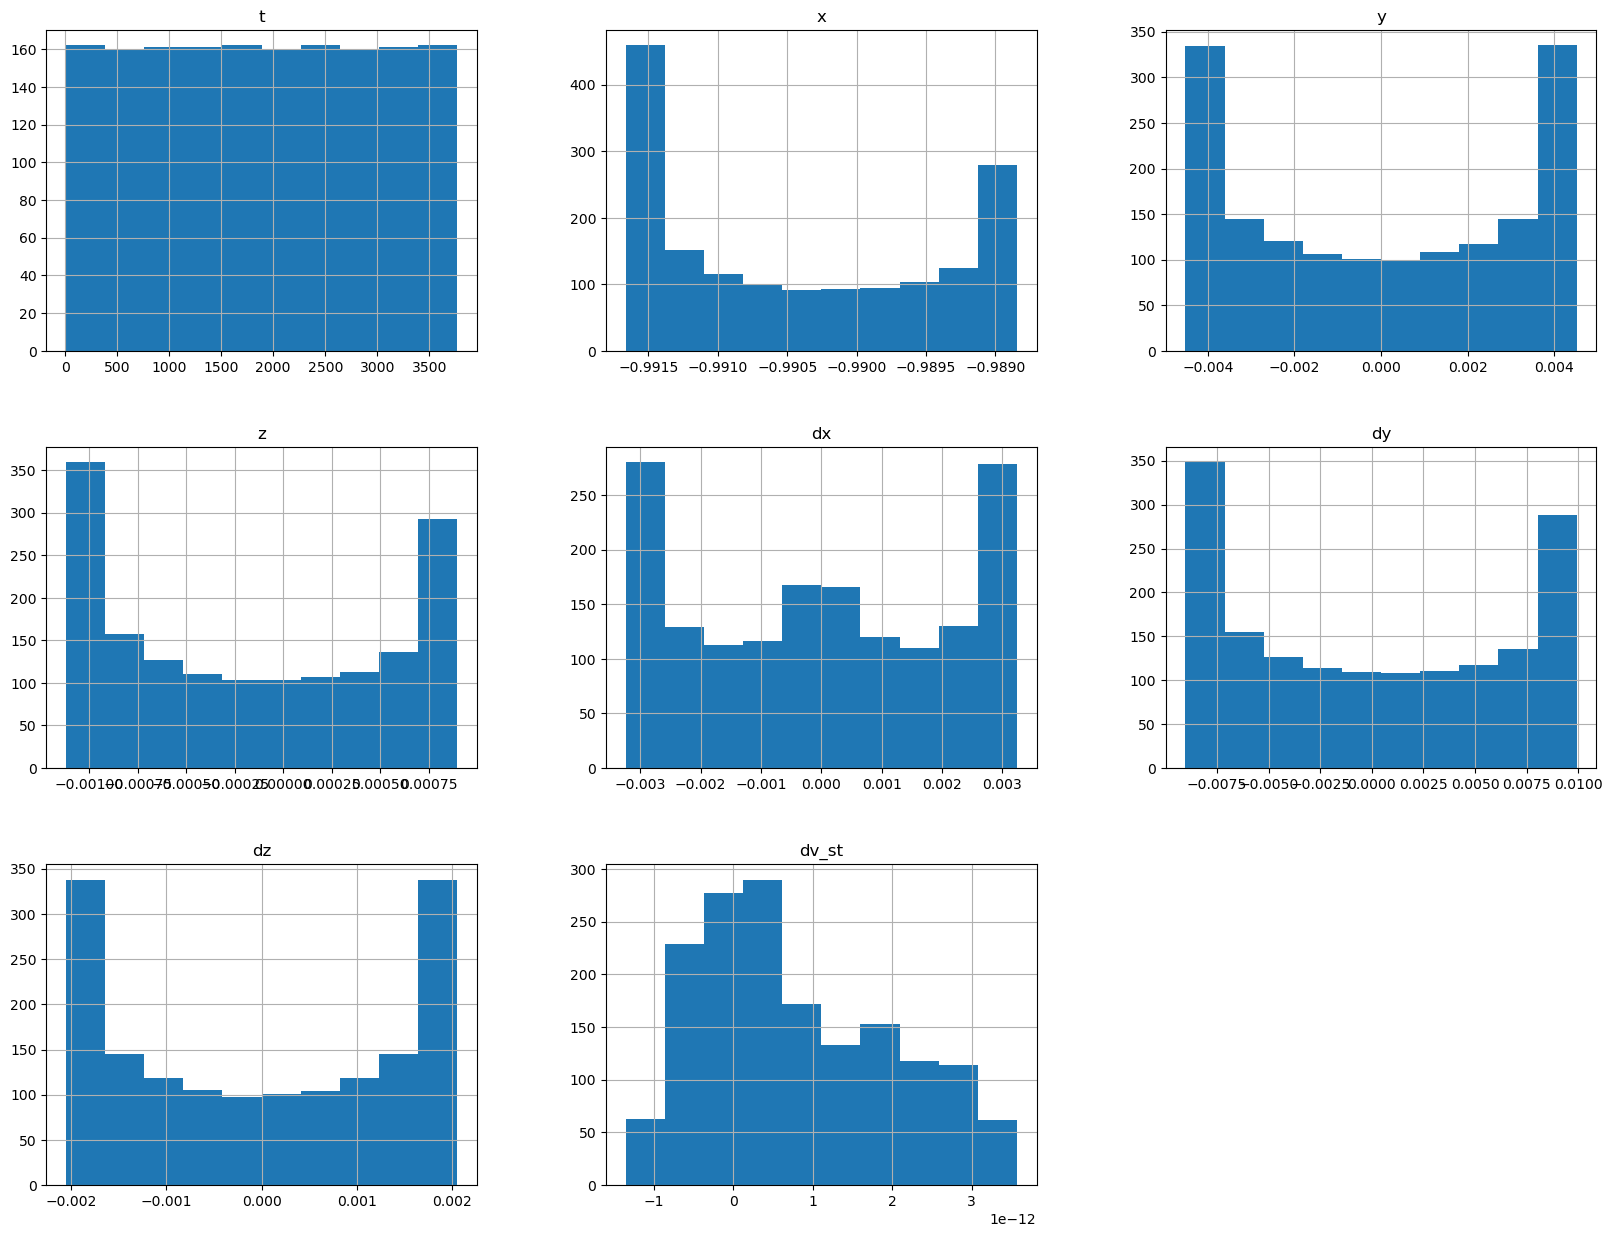

In [180]:
maneuvers.hist(figsize=(20,15))
plt.show()

Histograms of attributes (x,y,z,dx,dy,dz) are tail heavy. We may need to transform to polar coords, or use angle in p.o. as extra attribute.

## Visualizing Data

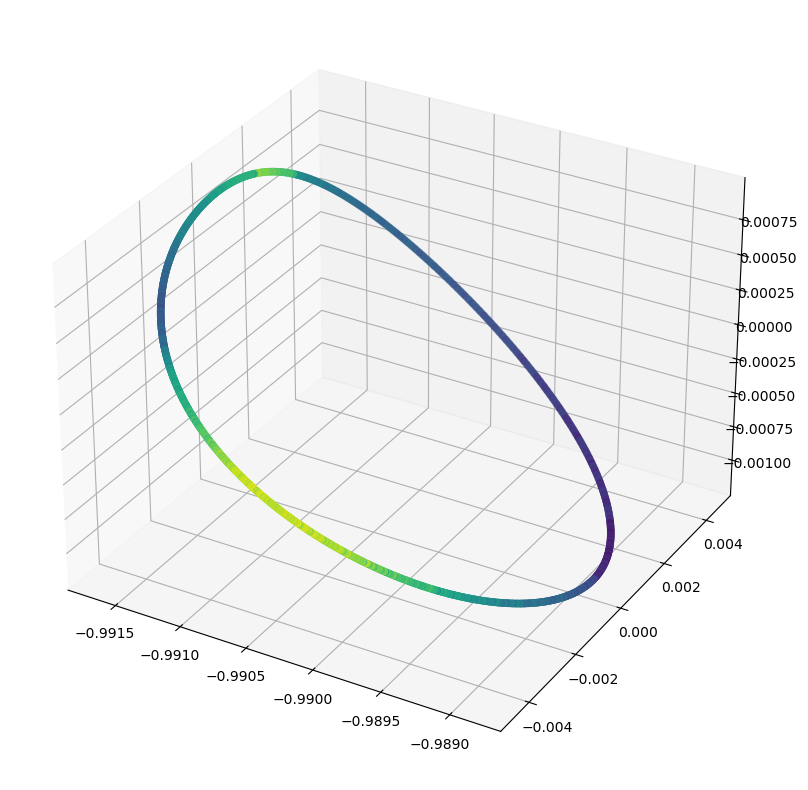

In [181]:
# Visualize shadowing orbit in position space, i.e. the points where correction
# maneuvers are performed.

fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')
ax.scatter3D(maneuvers['x'], maneuvers['y'], maneuvers['z'], c=maneuvers['dv_st'])
plt.show()

Try adding new attribute "angle" = angle in the periodic orbit, which is essentially time/period.

In [182]:
#maneuvers["angle"]=maneuvers["t"].apply(lambda x: math.fmod(x, 0.3059226605957322E+01))
maneuvers = maneuvers.drop(["t"], axis=1)
corr_matrix = maneuvers.corr()
corr_matrix["dv_st"].sort_values(ascending=False)

dv_st    1.000000
dz       0.577648
dy       0.331256
z        0.326636
x       -0.357535
y       -0.622603
dx      -0.727325
Name: dv_st, dtype: float64

array([[<Axes: xlabel='x', ylabel='x'>, <Axes: xlabel='dx', ylabel='x'>,
        <Axes: xlabel='dv_st', ylabel='x'>],
       [<Axes: xlabel='x', ylabel='dx'>,
        <Axes: xlabel='dx', ylabel='dx'>,
        <Axes: xlabel='dv_st', ylabel='dx'>],
       [<Axes: xlabel='x', ylabel='dv_st'>,
        <Axes: xlabel='dx', ylabel='dv_st'>,
        <Axes: xlabel='dv_st', ylabel='dv_st'>]], dtype=object)

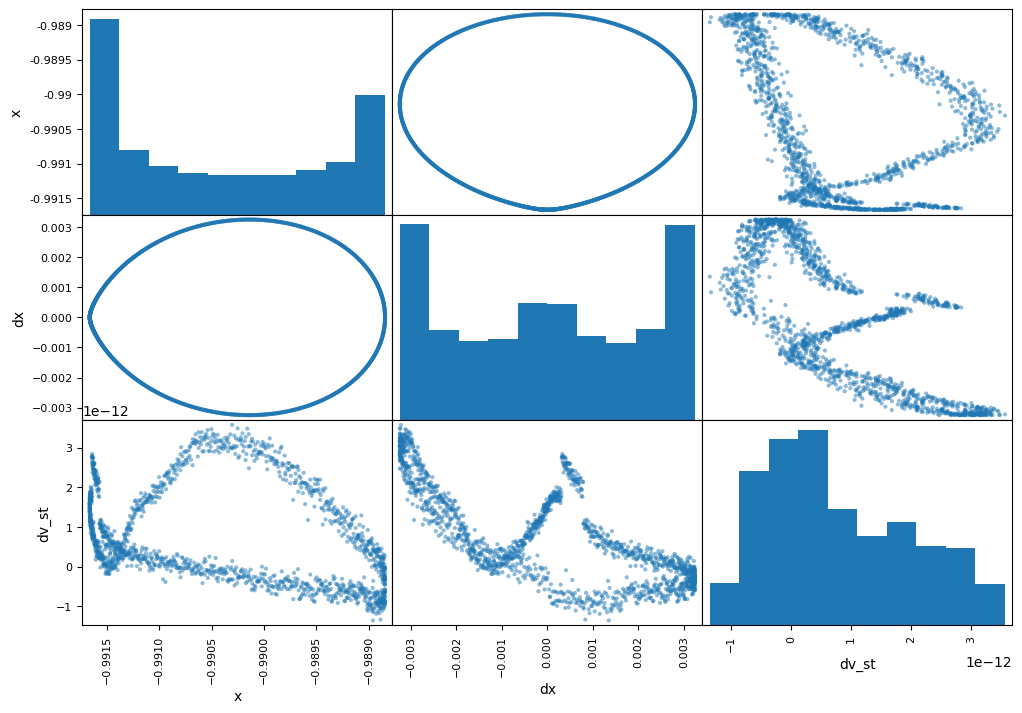

In [183]:
#attributes = ["angle", "x", "dx", "dv_st"]
attributes = ["x", "dx", "dv_st"]
scatter_matrix(maneuvers[attributes], figsize=(12, 8))

dv_st is either positively or negatively correlated to state variables (x,y,z,dx,dy,dz) !!

Notice that angle and dv_st are not correlated, but they are nonlinearly related ("V" shape) !!

# Prepare the Data for Machine Learning Algorithms

## Create a Train/Test Set

In [184]:
# Let's separate the predictors and the labels
maneuvers_predictors = maneuvers.drop("dv_st", axis=1)
maneuvers_labels = maneuvers[["dv_st"]].copy()
maneuvers_predictors.head()
#maneuvers_labels.head()

,x,y,z,dx,dy,dz
0,-0.991632,0.001648,0.000819,0.000412,0.009151,-0.000904
1,-0.991159,-0.004179,0.000217,-0.002208,0.003548,0.002003
2,-0.989104,-0.002210,-0.001006,-0.001970,-0.007873,0.000886
3,-0.989641,0.003628,-0.000752,0.003004,-0.005385,-0.001497
4,-0.991507,0.003047,0.000603,0.001104,0.007085,-0.001584


In [185]:
## Create Train/Test/Validation Sets

In [186]:
X_train_full, X_test, y_train_full, y_test = train_test_split(
maneuvers_predictors, maneuvers_labels, test_size=0.2, random_state=1)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)
print(X_train.shape)
print(X_test.shape)
print(X_valid.shape)
X_train.head()

(966, 6)
(323, 6)
(322, 6)


,x,y,z,dx,dy,dz
402,-0.991307,0.003871,0.000361,0.001824,0.004851,-0.001909
306,-0.991154,-0.004187,0.000213,-0.002220,0.003507,0.002005
262,-0.990971,0.004401,0.000058,0.002582,0.002113,-0.002048
1000,-0.991663,-0.000372,0.000894,-0.000077,0.009892,0.000208
765,-0.988894,0.000995,-0.001099,0.000909,-0.008810,-0.000395


In [187]:
# Scale all the features
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)
X_train_scaled[:5]

array([[1.26794004e-01, 9.28120715e-01, 7.33786685e-01, 7.80949159e-01,
        7.32114220e-01, 3.46620848e-02],
       [1.80941919e-01, 3.69422942e-02, 6.60420734e-01, 1.58052605e-01,
        6.61239612e-01, 9.88707193e-01],
       [2.45685531e-01, 9.86688374e-01, 5.84027723e-01, 8.97765131e-01,
        5.87746796e-01, 8.05601821e-04],
       [4.96119636e-04, 4.58822900e-01, 9.98061675e-01, 4.88151811e-01,
        9.97937514e-01, 5.50772049e-01],
       [9.81997945e-01, 6.10007752e-01, 1.08890251e-02, 6.39977227e-01,
        1.17730540e-02, 4.03738139e-01]])

In [188]:
# Scale target variable dv_st as well.
# Rationale: dv_st takes very small values (10^{-8}), 
# so MSE may be tiny and not computed properly. Also, NN may converge faster?

scaler_target = MinMaxScaler()
y_train_scaled = scaler.fit_transform(y_train)
y_valid_scaled = scaler.transform(y_valid)
y_test_scaled = scaler.transform(y_test)

# Select and Train a Model

## Training and Evaluating on the Training Set

In [189]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train_scaled)

LinearRegression()

In [190]:
# Let's measure this regression model's RMSE on the whole training set
from sklearn.metrics import mean_squared_error
maneuvers_predictions = lin_reg.predict(X_train_scaled)
lin_mse = mean_squared_error(y_train_scaled, maneuvers_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

0.05632085245967546

Clearly not a great score: the SD(dv_st) value is 8.e-7, so a typical prediction error of 6.6.e-7 is not great.

In [191]:
# Let’s train a DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train_scaled, y_train_scaled)

maneuvers_predictions = tree_reg.predict(X_train_scaled)
tree_mse = mean_squared_error(y_train_scaled, maneuvers_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

NOW THIS IS MUCH BETTER!!

In [192]:
#Let's try it out on 5 instances from the test set
some_data = X_test_scaled[10:20]
some_labels = y_test_scaled[10:20]
print("Predictions:", list(tree_reg.predict(some_data)))
print("Labels:", list(some_labels))

Predictions: [0.255322543808283, 0.4292423821250902, 0.8348466444833427, 0.6048059106225093, 0.26268008927957986, 0.8857233144046001, 0.8357858323820642, 0.17313720904872876, 0.2899186688492805, 0.06668761454888203]
Labels: [array([0.20773332]), array([0.47276155]), array([0.79641516]), array([0.64715089]), array([0.26189737]), array([0.91233574]), array([0.88603638]), array([0.17376338]), array([0.28209149]), array([0.11678152])]


In [193]:
# Let’s train a RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(X_train_scaled, y_train_scaled)

maneuvers_predictions = forest_reg.predict(X_train_scaled)
forest_mse = mean_squared_error(y_train_scaled, maneuvers_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

/home/pablo/anaconda3/envs/halo/lib/python3.12/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


0.016015310141724137

## Polynomial Regression

In [194]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
maneuvers_pred_poly = poly_features.fit_transform(X_train_scaled)
#print(X_train_scaled.head())
#print(maneuvers_pred_poly[0])

In [195]:
lin_reg = LinearRegression()
lin_reg.fit(maneuvers_pred_poly, y_train_scaled)
maneuvers_predictions = lin_reg.predict(maneuvers_pred_poly)
lin_mse = mean_squared_error(y_train_scaled, maneuvers_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

0.04140809173542217

## SVM Regression

In [196]:
from sklearn.svm import SVR

svm_poly_reg = SVR(kernel="poly", degree=2)
svm_poly_reg.fit(X_train_scaled, y_train_scaled)
maneuvers_predictions = svm_poly_reg.predict(X_train_scaled)
svm_mse = mean_squared_error(y_train_scaled, maneuvers_predictions)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

/home/pablo/anaconda3/envs/halo/lib/python3.12/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.05890274309780114

## Cross-validation

Scikit-Learn’s K-fold cross-validation feature. The following code randomly splits the training set into 10 distinct subsets called folds, then it trains and evaluates the Decision Tree model 10 times, picking a different fold for evaluation every time and training on the other 9 folds. The result is an array containing the 10 evaluation scores.

In [197]:
from sklearn.model_selection import cross_val_score
tree_reg = DecisionTreeRegressor()
scores = cross_val_score(tree_reg, X_train_scaled, y_train_scaled,
scoring="neg_root_mean_squared_error", cv=5)
tree_rmse_scores = -scores

In [198]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
    
display_scores(tree_rmse_scores)

Scores: [0.05082009 0.0490828  0.05369744 0.05144434 0.05578826]
Mean: 0.052166587888552426
Standard deviation: 0.0023368553468684945
